# Varying initial concentrations and parameters

A version of this notebook may be run online via Google Colab at https://tinyurl.com/rxd-initial-and-parameters
 (make a copy or open in playground mode).

In [1]:
%matplotlib inline

Often we will want to see how the choice of initial conditions affects the dynamics. We can do this by setting the initial attribute of an `rxd.Species` and rerunning.

For example, suppose at a single point we have the bistable dynamics introduced in the first part of this tutorial. That is, $u'=-u(1-u)(\alpha - u)$. (Here we use $u$ instead of a specific molecule name to indicate that we are not describing any particular molecule's kinetics, but rather modeling a class of phenomena.)

This time, we'll use an `rxd.Parameter` for $\alpha$ instead of a constant. This offers two advantages: (1) this allows $\alpha$ to vary spatially, and (2) this allows us to change the parameter values and rerun without changing the reaction/rate specification.

We start by defining the model and setting up the recordings:

In [2]:
from neuron import h, rxd
from neuron.units import mV, ms, mM
from matplotlib import pyplot as plt

h.load_file("stdrun.hoc")

soma = h.Section(name="soma")
cyt = rxd.Region([soma], name="cyt", nrn_region="i")
u = rxd.Species(cyt, name="u")
α = rxd.Parameter(cyt, value=0.3 * mM)

rate = rxd.Rate(u, -u * (1 * mM - u) * (α - u))

h.finitialize(-65 * mV)

t = h.Vector().record(h._ref_t)
y = h.Vector().record(soma(0.5)._ref_ui)

Now we define a function that sets the initial value for ca, runs the simulation, and plots the curves:

In [3]:
def plot_it(ca_init):
    u.initial = ca_init
    h.finitialize(-65 * mV)
    h.continuerun(10 * ms)
    plt.plot(t, y)

And now let's run it a few times and plot it:

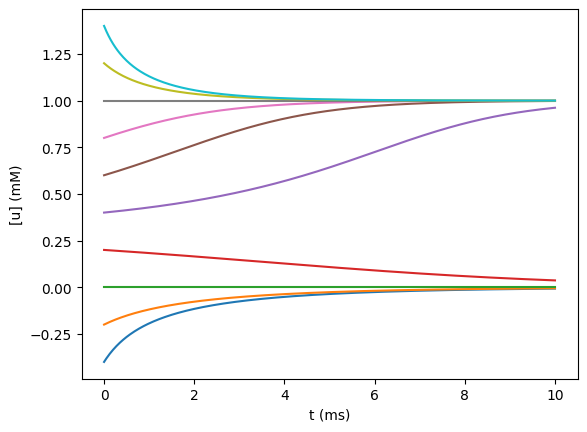

In [4]:
for u0 in range(-4 * mM, 15 * mM, 2 * mM):
    plot_it(u0 * 0.1)

plt.xlabel("t (ms)")
plt.ylabel("[u] (mM)")
plt.show()

Here we see the stable fixed points at $0$ and $1$ and how all other trajectories (except for the one starting exactly at $\alpha$, not shown) tend towards one of those values.

<hr/>

Alternatively, we might want to know how the kinetics change if we start at a fixed value (say 0.5) and vary $\alpha$ instead. We can do this in the same way as above by setting the `value` property of $\alpha$:

In [5]:
def plot_α(α_init):
    u.initial = 0.5 * mM
    α.value = α_init
    h.finitialize(-65 * mV)
    h.continuerun(10 * ms)
    plt.gca().plot(t, y, label=f"α = {α_init} mM")

Here we have added a `label` argument to the plot and explicitly specify the `gca()` axes to allow displaying a legend; see the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html">matplotlib.pyplot.legend</a> documentation for more.

Now we run it:

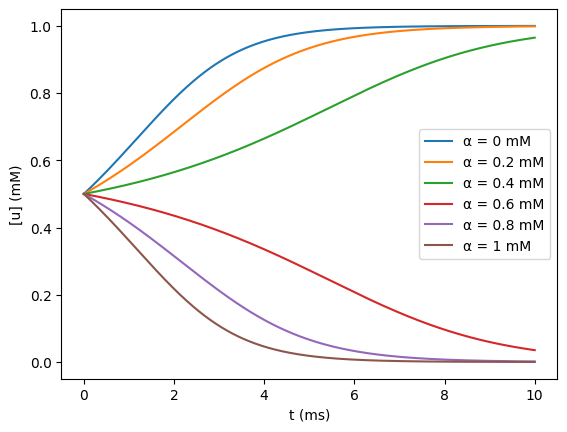

In [6]:
for my_α in [0 * mM, 0.2 * mM, 0.4 * mM, 0.6 * mM, 0.8 * mM, 1 * mM]:
    plot_α(my_α)

plt.gca().legend()
plt.xlabel("t (ms)")
plt.ylabel("[u] (mM)")
plt.show()